In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import datasets, layers, models, metrics
import matplotlib.pyplot as plt
import tensorflow as tf

import numpy as np
import cv2
import os
import random
import math
from PIL import Image
#https://www.youtube.com/watch?v=uqomO_BZ44g
#https://www.tensorflow.org/tutorials/images/classification

In [2]:
import seaborn as sns

### Dealing with duplicates

#### Get the images from the folders

In [4]:
#folder_names = ['Triomphe','bigBen', 'Liberty', 'Pisa', 'Basilica', 'Eiffel', 'Notre-Dame', 'TowerBridge', 'Triomphe', 'Wall', 'Washington']
folder_names = ['Eiffel']
i = 0
images = []
arr = []
while i < len(folder_names):
    dire = 'images/' + folder_names[i] + '/'
    arr.append(os.listdir(dire))
    images.append([(x,cv2.imread(dire + x)) for x in arr[i]])
    i = i+1

In [8]:
len(images[0])

889

In [5]:
no = images[0][0][1].shape[0] * images[0][0][1].shape[1] * images[0][0][1].shape[2]
z = 0
duplicates = []
dup = []
while z <len(folder_names):
    duplicates.append({})
    dup.append([])
    i = 0
    while i <len(arr[z]):
        m = False
        if arr[z][i] not in dup[z]:
            duplicates[z][arr[z][i]] = []
            for j in range(i+1,len(arr[z])):
                if np.sum(images[z][i][1] == images[z][j][1])/no > 0.1 or np.sum(images[z][i][1] == np.flip(images[z][j][1], 1))/no > 0.1:
                    duplicates[z][arr[z][i]].append(arr[z][j])
                    dup[z].append(arr[z][j])
                    m = True
        if m:
            dup[z].append(arr[z][i])
        i = i + 1
    z = z+1

KeyboardInterrupt: 

In [9]:
dup

[['BigBen352.jpeg',
  'Eiffel102.jpeg',
  'Eiffel205.jpeg',
  'Eiffel29.jpeg',
  'Eiffel866.jpeg',
  'Pisa119.jpeg',
  'Tower Bridge237.jpeg',
  'BigBen235.jpeg',
  'Eiffel351.jpeg',
  'Eiffel479.jpeg',
  'Eiffel718.jpeg',
  'Eiffel719.jpeg',
  'Pisa414.jpeg',
  'Eiffel0.jpeg',
  'Eiffel348.jpeg',
  'Eiffel1.jpeg',
  'Eiffel105.jpeg',
  'Eiffel358.jpeg',
  'Tower Bridge148.jpeg',
  'Eiffel10.jpeg',
  'Eiffel433.jpeg',
  'Eiffel551.jpeg',
  'Tower Bridge191.jpeg',
  'Eiffel100.jpeg',
  'Eiffel27.jpeg',
  'Pisa411.jpeg',
  'Tower Bridge181.jpeg',
  'Triomphe224.jpeg',
  'Eiffel101.jpeg',
  'Eiffel867.jpeg',
  'Tower Bridge66.jpeg',
  'Eiffel104.jpeg',
  'Eiffel38.jpeg',
  'Eiffel106.jpeg',
  'Eiffel491.jpeg',
  'Pisa430.jpeg',
  'Tower Bridge228.jpeg',
  'Eiffel107.jpeg',
  'Eiffel55.jpeg',
  'Eiffel108.jpeg',
  'Eiffel214.jpeg',
  'Eiffel651.jpeg',
  'Eiffel657.jpeg',
  'Eiffel924.jpeg',
  'Pisa660.jpeg',
  'Tower Bridge72.jpeg',
  'Tower Bridge77.jpeg',
  'Eiffel109.jpeg',
  'Pisa619.j

In [29]:
for i in range(0, len(folder_names)):
    print(len(set(dup[i])) == len(dup[i]))
    print(len(set(dup[i])), len(dup[i]))
    print('No of images I need for validation')
    print(math.floor(len(arr[i])*0.2))
    print('No of images I have for validation')
    print(len(arr[i]) - len(set(dup[i])))
    print(len(set(dup[i]))/ len(arr[i]))

True
55 55
No of images I need for validation
14
No of images I have for validation
15
0.7857142857142857


In [30]:
val = []
set_difference = []
unique = []
for i in range(0, len(folder_names)):
    set_difference.append(set(arr[i]) - set(dup[i]))
    unique.append(list(set_difference[i]))
    val.append(random.sample(set(unique[i]), math.floor(len(arr[i])*0.2)))

Before doing this delete all the images in the folders!!

In [31]:
# len(folder_names)
for z in range(0, len(folder_names)):
    for i in images[z]:
        if i[0] in val[z]:
            Image.fromarray(i[1]).save(folder_names[z] + '/validation/' + i[0])
        else:
            Image.fromarray(i[1]).save(folder_names[z] + '/training/' + i[0])

## Training and Validation sets

In [2]:
batch_size = 32
img_height = 400
img_width = 600

In [204]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  "images_model/Training",
  validation_split=None,
  subset=None,
  seed=None,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1915 files belonging to 10 classes.


In [205]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  "images_model/Validation",
  validation_split=None,
  subset=None,
  seed=None,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 473 files belonging to 10 classes.


In [206]:
class_names = train_ds.class_names
num_classes = len(class_names)
print(class_names)

['Basilica', 'Eiffel', 'Liberty', 'Notre-Dame', 'Pisa', 'TowerBridge', 'Triomphe', 'Wall', 'Washington', 'bigBen']


# Changing filter size

In [232]:
model66 = models.Sequential()
# Conv2D(#filters, size of filter, )
model66.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)))
model66.add(layers.Conv2D(96, (11, 11), strides=(4, 4), padding= 'valid', input_shape=(img_height, img_width, 3),data_format='channels_last'))
model66.add(layers.Activation('relu'))
model66.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

model66.add(layers.Conv2D(256, (5, 5), strides=(1, 1), padding = 'same'))
model66.add(layers.Activation('relu'))
model66.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

model66.add(layers.Conv2D(384, (3, 3), padding = 'same'))
model66.add(layers.Activation('relu'))
model66.add(layers.Conv2D(384, (3, 3), padding = 'same'))
model66.add(layers.Activation('relu'))
model66.add(layers.Conv2D(384, (3, 3), padding = 'same'))
model66.add(layers.Activation('relu'))
model66.add(layers.MaxPooling2D(pool_size=(2, 2)))

model66.add(layers.Flatten())
model66.add(layers.Dense(128))
model66.add(layers.Activation('relu'))
model66.add(layers.Dropout(0.3))
model66.add(layers.Dense(128))
model66.add(layers.Activation('relu'))
model66.add(layers.Dropout(0.3))
model66.add(layers.Dense(num_classes))
model66.add(layers.Activation('softmax'))

model66.compile(optimizer = 'adam',
            # optimizer = tf.optimizers.SGD(lr=0.001),
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])

In [233]:
model66.summary()

Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_30 (Rescaling)     (None, 400, 600, 3)       0         
_________________________________________________________________
conv2d_108 (Conv2D)          (None, 98, 148, 96)       34944     
_________________________________________________________________
activation_168 (Activation)  (None, 98, 148, 96)       0         
_________________________________________________________________
max_pooling2d_97 (MaxPooling (None, 48, 73, 96)        0         
_________________________________________________________________
conv2d_109 (Conv2D)          (None, 48, 73, 256)       614656    
_________________________________________________________________
activation_169 (Activation)  (None, 48, 73, 256)       0         
_________________________________________________________________
max_pooling2d_98 (MaxPooling (None, 23, 36, 256)     

In [234]:
epochs = 10
history66 = model66.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
) 

Epoch 1/10
60/60 [==============================] - 586s 10s/step - loss: 2.2863 - accuracy: 0.3129 - val_loss: 1.8643 - val_accuracy: 0.3742
Epoch 2/10
60/60 [==============================] - 603s 10s/step - loss: 1.8961 - accuracy: 0.3544 - val_loss: 1.8394 - val_accuracy: 0.3742
Epoch 3/10
60/60 [==============================] - 571s 10s/step - loss: 1.9170 - accuracy: 0.3651 - val_loss: 1.8324 - val_accuracy: 0.3742
Epoch 4/10
60/60 [==============================] - 547s 9s/step - loss: 1.8480 - accuracy: 0.3786 - val_loss: 1.8394 - val_accuracy: 0.3742
Epoch 5/10
60/60 [==============================] - 534s 9s/step - loss: 1.8707 - accuracy: 0.3800 - val_loss: 1.8496 - val_accuracy: 0.3742
Epoch 6/10
60/60 [==============================] - 536s 9s/step - loss: 1.8648 - accuracy: 0.3781 - val_loss: 1.8480 - val_accuracy: 0.3742
Epoch 7/10
60/60 [==============================] - 537s 9s/step - loss: 1.8417 - accuracy: 0.3746 - val_loss: 1.8465 - val_accuracy: 0.3742
Epoch 8/10

In [240]:
model66.optimizer.get_config()

{'name': 'SGD',
 'learning_rate': 0.01,
 'decay': 0.0,
 'momentum': 0.0,
 'nesterov': False}

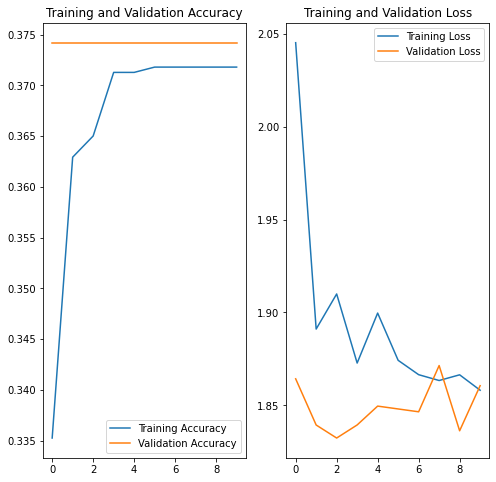

In [238]:
acc = history66.history['accuracy']
val_acc = history66.history['val_accuracy']

loss = history66.history['loss']
val_loss = history66.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## 1st Model

In [198]:
model = models.Sequential()
# Conv2D(#filters, size of filter, )
model.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)))
model.add(layers.Conv2D(32, (3, 3), padding= 'same', input_shape=(img_height, img_width, 3),data_format='channels_last'))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(64, (3, 3)))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(64, (3, 3)))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(64, (3, 3)))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(64))
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(num_classes))
model.add(layers.Activation('softmax'))

model.compile(optimizer='SGD',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [236]:
model.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_21 (Rescaling)     (None, 400, 600, 3)       0         
_________________________________________________________________
conv2d_69 (Conv2D)           (None, 400, 600, 32)      896       
_________________________________________________________________
activation_105 (Activation)  (None, 400, 600, 32)      0         
_________________________________________________________________
max_pooling2d_69 (MaxPooling (None, 200, 300, 32)      0         
_________________________________________________________________
conv2d_70 (Conv2D)           (None, 198, 298, 64)      18496     
_________________________________________________________________
activation_106 (Activation)  (None, 198, 298, 64)      0         
_________________________________________________________________
max_pooling2d_70 (MaxPooling (None, 99, 149, 64)     

In [199]:
epochs = 15
history8 = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
) 

Epoch 1/10
60/60 [==============================] - 452s 7s/step - loss: 2.0718 - accuracy: 0.3496 - val_loss: 1.8652 - val_accuracy: 0.3742
Epoch 2/10
60/60 [==============================] - 488s 8s/step - loss: 1.8803 - accuracy: 0.3660 - val_loss: 1.7257 - val_accuracy: 0.3932
Epoch 3/10
60/60 [==============================] - 449s 7s/step - loss: 1.7091 - accuracy: 0.4191 - val_loss: 1.5901 - val_accuracy: 0.4313
Epoch 4/10
60/60 [==============================] - 474s 8s/step - loss: 1.4792 - accuracy: 0.5062 - val_loss: 1.4427 - val_accuracy: 0.5201
Epoch 5/10
60/60 [==============================] - 594s 10s/step - loss: 1.3165 - accuracy: 0.5686 - val_loss: 1.3377 - val_accuracy: 0.5581
Epoch 6/10
60/60 [==============================] - 689s 11s/step - loss: 1.1580 - accuracy: 0.6215 - val_loss: 1.3160 - val_accuracy: 0.5793
Epoch 7/10
60/60 [==============================] - 436s 7s/step - loss: 0.9925 - accuracy: 0.6574 - val_loss: 1.2570 - val_accuracy: 0.5877
Epoch 8/10


In [ ]:
model.

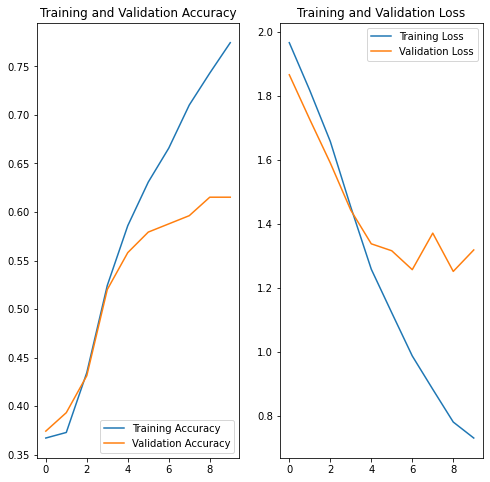

In [239]:
acc = history8.history['accuracy']
val_acc = history8.history['val_accuracy']

loss = history8.history['loss']
val_loss = history8.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Run this
### with RMSprop

In [196]:
history8 = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
) 

Epoch 1/10
60/60 [==============================] - 477s 8s/step - loss: 1.1049 - accuracy: 0.6517 - val_loss: 1.2319 - val_accuracy: 0.5983
Epoch 2/10
60/60 [==============================] - 476s 8s/step - loss: 0.6996 - accuracy: 0.7775 - val_loss: 1.1482 - val_accuracy: 0.6490
Epoch 3/10
60/60 [==============================] - 489s 8s/step - loss: 0.3714 - accuracy: 0.8856 - val_loss: 1.4922 - val_accuracy: 0.6321
Epoch 4/10
60/60 [==============================] - 461s 8s/step - loss: 0.2649 - accuracy: 0.9191 - val_loss: 1.7596 - val_accuracy: 0.6512
Epoch 5/10
60/60 [==============================] - 451s 7s/step - loss: 0.1592 - accuracy: 0.9499 - val_loss: 2.0064 - val_accuracy: 0.6575
Epoch 6/10
60/60 [==============================] - 468s 8s/step - loss: 0.1554 - accuracy: 0.9593 - val_loss: 2.1538 - val_accuracy: 0.6490
Epoch 7/10
60/60 [==============================] - 627s 10s/step - loss: 0.0764 - accuracy: 0.9812 - val_loss: 2.4542 - val_accuracy: 0.6385
Epoch 8/10
6

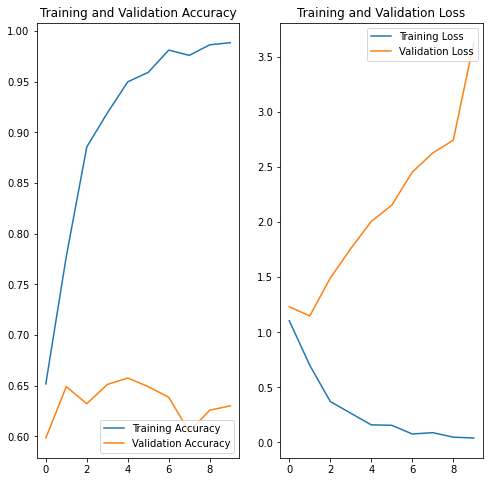

In [197]:
acc = history8.history['accuracy']
val_acc = history8.history['val_accuracy']

loss = history8.history['loss']
val_loss = history8.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [29]:
epochs=10
history = model.fait(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
60/60 [==============================] - 436s 7s/step - loss: 1.9377 - accuracy: 0.3462 - val_loss: 1.4084 - val_accuracy: 0.5349
Epoch 2/10
60/60 [==============================] - 427s 7s/step - loss: 1.1876 - accuracy: 0.6147 - val_loss: 1.2405 - val_accuracy: 0.6216
Epoch 3/10
60/60 [==============================] - 454s 8s/step - loss: 0.8604 - accuracy: 0.7225 - val_loss: 1.2818 - val_accuracy: 0.6385
Epoch 4/10
60/60 [==============================] - 457s 8s/step - loss: 0.5692 - accuracy: 0.8329 - val_loss: 1.1979 - val_accuracy: 0.6321
Epoch 5/10
60/60 [==============================] - 487s 8s/step - loss: 0.4498 - accuracy: 0.8608 - val_loss: 1.3408 - val_accuracy: 0.6702
Epoch 6/10
60/60 [==============================] - 520s 9s/step - loss: 0.2954 - accuracy: 0.9121 - val_loss: 1.4331 - val_accuracy: 0.6660
Epoch 7/10
60/60 [==============================] - 449s 7s/step - loss: 0.1854 - accuracy: 0.9339 - val_loss: 1.7680 - val_accuracy: 0.6596
Epoch 8/10
60

In [74]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [91]:
preds = np.round(model.predict(val_ds),0)

In [97]:
preds.shape

(473, 10)

In [136]:
test_label = np.concatenate([y for x, y in val_ds], axis=0) 
predictions =  np.array([])
for x, y in val_ds:
    predictions = np.concatenate([predictions, model.predict_classes(x)])
    #labels = np.concatenate([labels, np.argmax(y.numpy(), axis=-1)])

C:\Users\catar\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [144]:
from sklearn import metrics
classi = metrics.classification_report(test_label,predictions, target_names = class_names)
print(classi)

              precision    recall  f1-score   support

    Basilica       0.00      0.00      0.00         3
      Eiffel       0.40      0.51      0.45       177
     Liberty       0.22      0.14      0.17        73
  Notre-Dame       0.00      0.00      0.00        12
        Pisa       0.11      0.08      0.09        61
 TowerBridge       0.00      0.00      0.00         8
    Triomphe       0.00      0.00      0.00        14
        Wall       0.00      0.00      0.00        21
  Washington       0.00      0.00      0.00        33
      bigBen       0.21      0.21      0.21        71

    accuracy                           0.25       473
   macro avg       0.09      0.09      0.09       473
weighted avg       0.23      0.25      0.24       473



C:\Users\catar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\catar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\catar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [152]:
aa = tf.math.confusion_matrix(test_label, predictions).numpy()
print(aa)

[[ 0  0  0  2  0  0  0  0  0  1]
 [ 0 90 18  3 19  2  0 19  6 20]
 [ 0 34 10  2  4  0  2  3  5 13]
 [ 0  3  1  0  0  0  1  3  1  3]
 [ 0 34  3  1  5  2  1  5  3  7]
 [ 0  4  0  0  2  0  0  0  0  2]
 [ 0  6  2  0  3  0  0  1  1  1]
 [ 0  5  2  3  4  0  0  0  3  4]
 [ 0 15  4  1  1  0  1  5  0  6]
 [ 0 32  5  1  8  0  0  9  1 15]]


In [161]:
from sklearn.metrics import confusion_matrix
conf_matr = confusion_matrix(test_label.tolist(), predictions.tolist())
cm_normalized = conf_matr.astype('float') / conf_matr.sum(axis=1)[:, np.newaxis]

In [164]:
cm_df = pd.DataFrame(cm_normalized,
                     index = class_names, 
                     columns = class_names)

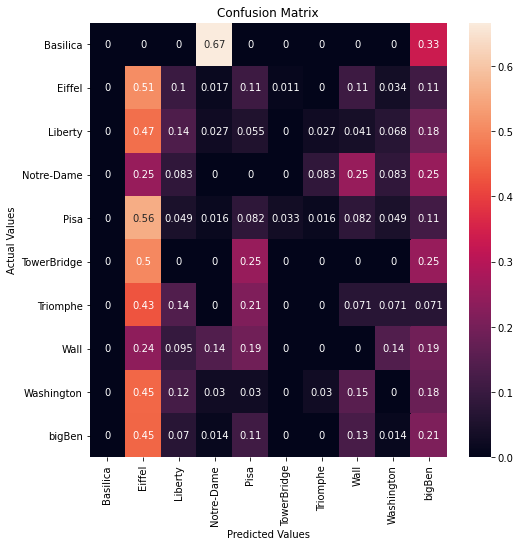

In [166]:
#Plotting the confusion matrix
plt.figure(figsize=(8,8))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [106]:
import pandas as pd
from sklearn.metrics import confusion_matrix

In [114]:
preds

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [107]:
categorical_test_labels = pd.DataFrame(test_label).idxmax(axis=1)
categorical_preds = pd.DataFrame(preds).idxmax(axis=1)
confusion_matrix= confusion_matrix(categorical_test_labels, categorical_preds)

In [108]:
confusion_matrix

array([[ 54, 206,  44,  12,  41,   1,   5,  28,  17,  65],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0]], dtype=int64)

In [109]:
from sklearn.metrics import plot_confusion_matrix

In [79]:
y_pred = model.predict(val_ds, batch_size=32)

In [111]:
y_pred

array([[3.1227664e-06, 1.0079183e-03, 1.5250890e-01, ..., 8.7332859e-04,
        2.0942104e-03, 1.8597822e-01],
       [1.6469379e-04, 7.4007827e-01, 5.4899743e-03, ..., 1.9567806e-05,
        1.3277643e-05, 1.2813389e-01],
       [1.2320867e-16, 1.0000000e+00, 1.9881823e-24, ..., 3.0240988e-15,
        3.7500359e-16, 2.2132234e-09],
       ...,
       [2.2219692e-06, 9.9783343e-01, 6.2541410e-08, ..., 7.7456210e-09,
        4.2737033e-10, 2.1523673e-03],
       [9.1101714e-07, 6.4201616e-02, 9.8064658e-05, ..., 6.5745015e-05,
        9.2926198e-01, 1.5284403e-03],
       [3.8000233e-06, 3.7198582e-01, 7.4985017e-08, ..., 6.2501800e-01,
        7.9262641e-04, 1.4804745e-03]], dtype=float32)

In [113]:
metrics.categorical_accuracy(test_label, y_pred)

<tf.Tensor: shape=(473,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0

In [ ]:
keras.metrics.top_k_categorical_accuracy(y_true, y_pred, k=5)

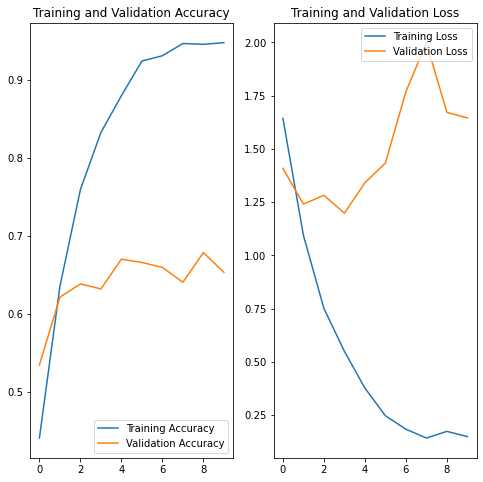

In [30]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [70]:
from tensorflow.keras import tfma

ImportError: cannot import name 'tfma' from 'tensorflow.keras' (C:\Users\catar\anaconda3\lib\site-packages\tensorflow\keras\__init__.py)

In [73]:
from google.protobuf import text_format
metrics = [
    #tfma.metrics.ExampleCount(name='example_count'),
    #tfma.metrics.WeightedExampleCount(name='weighted_example_count'),
    tf.keras.metrics.SparseCategoricalCrossentropy(
        name='sparse_categorical_crossentropy'),
    tf.keras.metrics.SparseCategoricalAccuracy(name='accuracy'),
    tf.keras.metrics.Precision(name='precision', top_k=1),
    tf.keras.metrics.Precision(name='precision', top_k=3),
    tf.keras.metrics.Recall(name='recall', top_k=1),
    tf.keras.metrics.Recall(name='recall', top_k=3),
    #tfma.metrics.MultiClassConfusionMatrixPlot(
    #    name='multi_class_confusion_matrix_plot'),
]
metrics_specs = tfma.metrics.specs_from_metrics(metrics)

NameError: name 'tfma' is not defined

# 2nd Model

In [8]:
model1 = models.Sequential()
# Conv2D(#filters, size of filter, )
model1.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)))
model1.add(layers.Conv2D(32, (3, 3), padding= 'same', input_shape=(img_height, img_width, 3),data_format='channels_last'))
model1.add(layers.Activation('relu'))
model1.add(layers.MaxPooling2D(pool_size=(2, 2)))

model1.add(layers.Conv2D(64, (3, 3)))
model1.add(layers.Activation('relu'))
model1.add(layers.MaxPooling2D(pool_size=(2, 2)))

model1.add(layers.Conv2D(128, (3, 3)))
model1.add(layers.Activation('relu'))
model1.add(layers.MaxPooling2D(pool_size=(2, 2)))

model1.add(layers.Flatten())
model1.add(layers.Dense(64))
model1.add(layers.Activation('relu'))
model1.add(layers.Dropout(0.2))
model1.add(layers.Dense(num_classes))
model1.add(layers.Activation('softmax'))

model1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [9]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 400, 600, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 400, 600, 32)      896       
_________________________________________________________________
activation_5 (Activation)    (None, 400, 600, 32)      0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 200, 300, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 198, 298, 64)      18496     
_________________________________________________________________
activation_6 (Activation)    (None, 198, 298, 64)      0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 99, 149, 64)      

In [10]:
epochs=10
history1 = model1.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
60/60 [==============================] - 933s 15s/step - loss: 4.4476 - accuracy: 0.3357 - val_loss: 1.3839 - val_accuracy: 0.5539
Epoch 2/10
60/60 [==============================] - 1066s 18s/step - loss: 0.8770 - accuracy: 0.7168 - val_loss: 1.4386 - val_accuracy: 0.6195
Epoch 3/10
60/60 [==============================] - 882s 14s/step - loss: 0.3906 - accuracy: 0.8769 - val_loss: 1.5356 - val_accuracy: 0.6025
Epoch 4/10
60/60 [==============================] - 859s 14s/step - loss: 0.1472 - accuracy: 0.9554 - val_loss: 1.8556 - val_accuracy: 0.6321
Epoch 5/10
60/60 [==============================] - 848s 14s/step - loss: 0.0525 - accuracy: 0.9861 - val_loss: 1.9506 - val_accuracy: 0.5941
Epoch 6/10
60/60 [==============================] - 666s 11s/step - loss: 0.1048 - accuracy: 0.9702 - val_loss: 2.6613 - val_accuracy: 0.5476
Epoch 7/10
60/60 [==============================] - 628s 10s/step - loss: 0.0375 - accuracy: 0.9899 - val_loss: 2.3894 - val_accuracy: 0.5941
Epoch

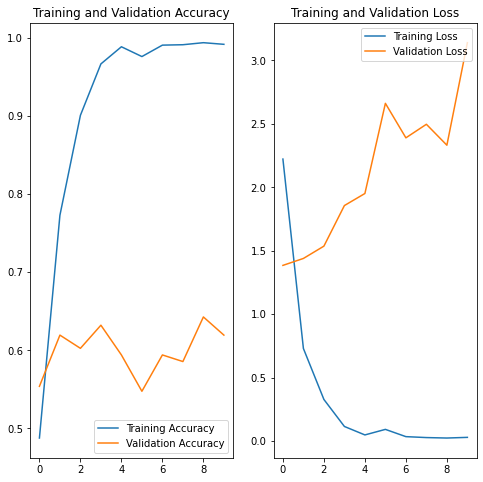

In [11]:
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']

loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# 3rd model

In [10]:
model2 = models.Sequential()
# Conv2D(#filters, size of filter, )
model2.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)))
model2.add(layers.Conv2D(32, (3, 3), padding= 'same', input_shape=(img_height, img_width, 3),data_format='channels_last'))
model2.add(layers.Activation('relu'))
model2.add(layers.MaxPooling2D(pool_size=(2, 2)))

model2.add(layers.BatchNormalization())
model2.add(layers.Conv2D(64, (3, 3)))
model2.add(layers.Activation('relu'))
model2.add(layers.MaxPooling2D(pool_size=(2, 2)))

model2.add(layers.BatchNormalization())
model2.add(layers.Conv2D(64, (3, 3)))
model2.add(layers.Activation('relu'))
model2.add(layers.MaxPooling2D(pool_size=(2, 2)))

model2.add(layers.Flatten())
model2.add(layers.Dense(64))
model2.add(layers.Activation('relu'))
model2.add(layers.Dropout(0.2))
model2.add(layers.Dense(num_classes))
model2.add(layers.Activation('softmax'))

model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [11]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 400, 600, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 400, 600, 32)      896       
_________________________________________________________________
activation_5 (Activation)    (None, 400, 600, 32)      0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 200, 300, 32)      0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 200, 300, 32)      128       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 198, 298, 64)      18496     
_________________________________________________________________
activation_6 (Activation)    (None, 198, 298, 64)     

In [12]:
epochs=7
history2 = model2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/7
60/60 [==============================] - 771s 13s/step - loss: 28.6166 - accuracy: 0.2133 - val_loss: 2.2735 - val_accuracy: 0.3742
Epoch 2/7
60/60 [==============================] - 743s 12s/step - loss: 2.2655 - accuracy: 0.3671 - val_loss: 2.2513 - val_accuracy: 0.3742
Epoch 3/7
60/60 [==============================] - 697s 12s/step - loss: 2.2267 - accuracy: 0.3604 - val_loss: 2.2016 - val_accuracy: 0.3742
Epoch 4/7
60/60 [==============================] - 754s 13s/step - loss: 2.2002 - accuracy: 0.3673 - val_loss: 2.1684 - val_accuracy: 0.3742
Epoch 5/7
60/60 [==============================] - 685s 11s/step - loss: 2.1626 - accuracy: 0.3783 - val_loss: 2.1380 - val_accuracy: 0.3742
Epoch 6/7
60/60 [==============================] - 740s 12s/step - loss: 2.1370 - accuracy: 0.3771 - val_loss: 2.1100 - val_accuracy: 0.3742
Epoch 7/7
60/60 [==============================] - 738s 12s/step - loss: 2.1090 - accuracy: 0.3726 - val_loss: 2.0843 - val_accuracy: 0.3742


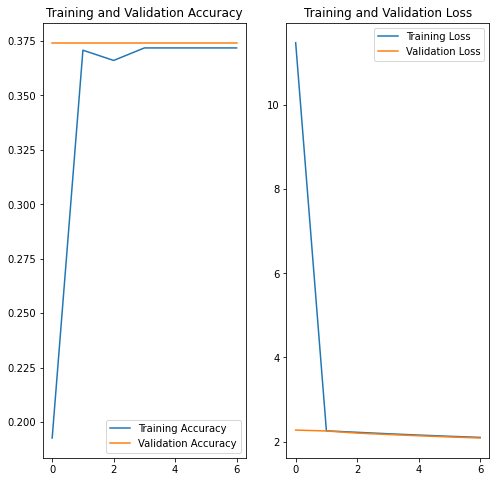

In [13]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']

loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
#4th model 

In [9]:
model3 = models.Sequential()
# Conv2D(#filters, size of filter, )
model3.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)))
#model3.add(data_augmentation)
model3.add(layers.Conv2D(32, (3, 3), padding= 'same', input_shape=(img_height, img_width, 3),data_format='channels_last'))
model3.add(layers.Activation('relu'))
model3.add(layers.MaxPooling2D(pool_size=(2, 2)))

#model3.add(layers.BatchNormalization())
model3.add(layers.Conv2D(64, (3, 3)))
model3.add(layers.Activation('relu'))
model3.add(layers.MaxPooling2D(pool_size=(2, 2)))

#model3.add(layers.BatchNormalization())
model3.add(layers.Conv2D(64, (3, 3)))
model3.add(layers.Activation('relu'))
model3.add(layers.MaxPooling2D(pool_size=(2, 2)))

model3.add(layers.Flatten())
model3.add(layers.Dense(32))
model3.add(layers.Activation('relu'))
model3.add(layers.Dropout(0.2))
model3.add(layers.Dense(num_classes))
model3.add(layers.Activation('softmax'))

model3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [10]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 400, 600, 3)       0         
_________________________________________________________________
sequential (Sequential)      (None, 400, 600, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 400, 600, 32)      896       
_________________________________________________________________
activation_5 (Activation)    (None, 400, 600, 32)      0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 200, 300, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 198, 298, 64)      18496     
_________________________________________________________________
activation_6 (Activation)    (None, 198, 298, 64)     

In [21]:
epochs=7
history2 = model3.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/7
60/60 [==============================] - 649s 11s/step - loss: 1.9870 - accuracy: 0.3181 - val_loss: 1.4553 - val_accuracy: 0.5518
Epoch 2/7
60/60 [==============================] - 615s 10s/step - loss: 1.1593 - accuracy: 0.5828 - val_loss: 1.2394 - val_accuracy: 0.5708
Epoch 3/7
60/60 [==============================] - 582s 10s/step - loss: 0.8704 - accuracy: 0.6848 - val_loss: 1.5398 - val_accuracy: 0.5793
Epoch 4/7
60/60 [==============================] - 763s 13s/step - loss: 0.6804 - accuracy: 0.7385 - val_loss: 1.5947 - val_accuracy: 0.6068
Epoch 5/7
60/60 [==============================] - 731s 12s/step - loss: 0.4857 - accuracy: 0.8422 - val_loss: 1.5236 - val_accuracy: 0.6258
Epoch 6/7
60/60 [==============================] - 730s 12s/step - loss: 0.3808 - accuracy: 0.8637 - val_loss: 1.5124 - val_accuracy: 0.6152
Epoch 7/7
60/60 [==============================] - 756s 13s/step - loss: 0.3042 - accuracy: 0.8891 - val_loss: 1.6683 - val_accuracy: 0.6490


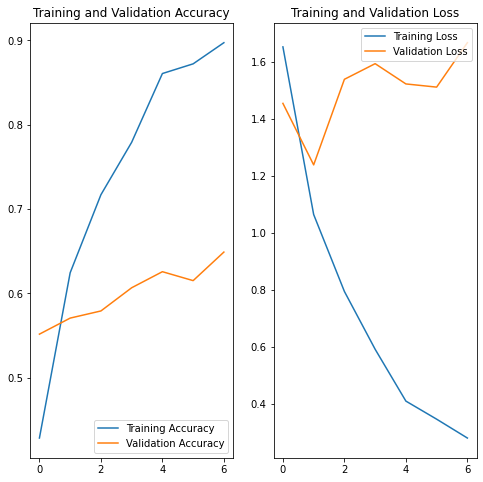

In [23]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']

loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# Model ...

In [11]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [12]:
model4 = models.Sequential()
# Conv2D(#filters, size of filter, )
model4.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)))
model4.add(data_augmentation)
model4.add(layers.Conv2D(32, (3, 3), padding= 'same', input_shape=(img_height, img_width, 3),data_format='channels_last'))
model4.add(layers.Activation('relu'))
model4.add(layers.MaxPooling2D(pool_size=(2, 2)))

#model3.add(layers.BatchNormalization())
model4.add(layers.Conv2D(64, (3, 3)))
model4.add(layers.Activation('relu'))
model4.add(layers.MaxPooling2D(pool_size=(2, 2)))

#model3.add(layers.BatchNormalization())
model4.add(layers.Conv2D(64, (3, 3)))
model4.add(layers.Activation('relu'))
model4.add(layers.MaxPooling2D(pool_size=(2, 2)))

model4.add(layers.Flatten())
model4.add(layers.Dense(64))
model4.add(layers.Activation('relu'))
model4.add(layers.Dropout(0.2))
model4.add(layers.Dense(num_classes))
model4.add(layers.Activation('softmax'))

model4.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [13]:
model4.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_2 (Rescaling)      (None, 400, 600, 3)       0         
_________________________________________________________________
sequential_3 (Sequential)    (None, 400, 600, 3)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 400, 600, 32)      896       
_________________________________________________________________
activation_10 (Activation)   (None, 400, 600, 32)      0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 200, 300, 32)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 198, 298, 64)      18496     
_________________________________________________________________
activation_11 (Activation)   (None, 198, 298, 64)     

In [14]:
epochs=10
history4 = model4.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
60/60 [==============================] - 790s 13s/step - loss: 3.0000 - accuracy: 0.3215 - val_loss: 1.6685 - val_accuracy: 0.4419
Epoch 2/10
60/60 [==============================] - 755s 13s/step - loss: 1.5801 - accuracy: 0.4556 - val_loss: 1.5914 - val_accuracy: 0.5137
Epoch 3/10
60/60 [==============================] - 761s 13s/step - loss: 1.3596 - accuracy: 0.5661 - val_loss: 1.4853 - val_accuracy: 0.4820
Epoch 4/10
60/60 [==============================] - 458s 8s/step - loss: 1.2681 - accuracy: 0.5836 - val_loss: 1.6201 - val_accuracy: 0.4968
Epoch 5/10
60/60 [==============================] - 446s 7s/step - loss: 1.0931 - accuracy: 0.6417 - val_loss: 1.3068 - val_accuracy: 0.5962
Epoch 6/10
60/60 [==============================] - 433s 7s/step - loss: 1.0019 - accuracy: 0.6639 - val_loss: 1.2380 - val_accuracy: 0.5941
Epoch 7/10
60/60 [==============================] - 443s 7s/step - loss: 0.9483 - accuracy: 0.6934 - val_loss: 1.3814 - val_accuracy: 0.6025
Epoch 8/10

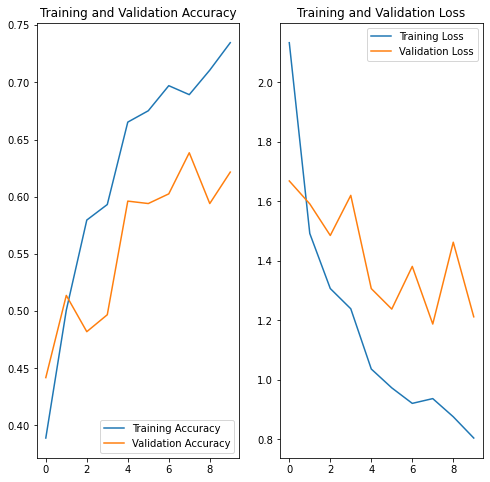

In [15]:
acc = history4.history['accuracy']
val_acc = history4.history['val_accuracy']

loss = history4.history['loss']
val_loss = history4.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# Model

In [16]:
model4 = models.Sequential()
# Conv2D(#filters, size of filter, )
model4.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)))
model4.add(data_augmentation)
model4.add(layers.Conv2D(16, (3, 3), padding= 'same', input_shape=(img_height, img_width, 3),data_format='channels_last'))
model4.add(layers.Activation('relu'))
model4.add(layers.MaxPooling2D(pool_size=(2, 2)))

#model3.add(layers.BatchNormalization())
model4.add(layers.Conv2D(32, (3, 3)))
model4.add(layers.Activation('relu'))
model4.add(layers.MaxPooling2D(pool_size=(2, 2)))

#model3.add(layers.BatchNormalization())
model4.add(layers.Conv2D(64, (3, 3)))
model4.add(layers.Activation('relu'))
model4.add(layers.MaxPooling2D(pool_size=(2, 2)))

#model3.add(layers.BatchNormalization())
model4.add(layers.Conv2D(64, (3, 3)))
model4.add(layers.Activation('relu'))
model4.add(layers.MaxPooling2D(pool_size=(2, 2)))

model4.add(layers.Flatten())
model4.add(layers.Dense(64))
model4.add(layers.Activation('relu'))
model4.add(layers.Dropout(0.2))
model4.add(layers.Dense(num_classes))
model4.add(layers.Activation('softmax'))

model4.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [17]:
model4.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_3 (Rescaling)      (None, 400, 600, 3)       0         
_________________________________________________________________
sequential_3 (Sequential)    (None, 400, 600, 3)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 400, 600, 16)      448       
_________________________________________________________________
activation_15 (Activation)   (None, 400, 600, 16)      0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 200, 300, 16)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 198, 298, 32)      4640      
_________________________________________________________________
activation_16 (Activation)   (None, 198, 298, 32)     

In [18]:
epochs=10
history4 = model4.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
60/60 [==============================] - 282s 5s/step - loss: 2.0407 - accuracy: 0.3348 - val_loss: 1.7138 - val_accuracy: 0.4503
Epoch 2/10
60/60 [==============================] - 275s 5s/step - loss: 1.6152 - accuracy: 0.4503 - val_loss: 1.4968 - val_accuracy: 0.5095
Epoch 3/10
60/60 [==============================] - 279s 5s/step - loss: 1.4321 - accuracy: 0.5117 - val_loss: 1.7959 - val_accuracy: 0.4249
Epoch 4/10
60/60 [==============================] - 279s 5s/step - loss: 1.4275 - accuracy: 0.5303 - val_loss: 1.2954 - val_accuracy: 0.5729
Epoch 5/10
60/60 [==============================] - 279s 5s/step - loss: 1.2248 - accuracy: 0.5849 - val_loss: 1.4603 - val_accuracy: 0.5603
Epoch 6/10
60/60 [==============================] - 270s 4s/step - loss: 1.1328 - accuracy: 0.6130 - val_loss: 1.3739 - val_accuracy: 0.5687
Epoch 7/10
60/60 [==============================] - 269s 4s/step - loss: 1.0600 - accuracy: 0.6566 - val_loss: 1.6153 - val_accuracy: 0.5624
Epoch 8/10
60

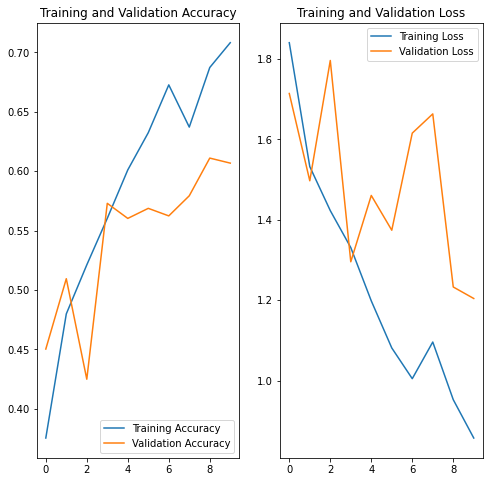

In [19]:
acc = history4.history['accuracy']
val_acc = history4.history['val_accuracy']

loss = history4.history['loss']
val_loss = history4.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [20]:
# Model

In [23]:
model = models.Sequential()
# Conv2D(#filters, size of filter, )
model.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)))
model.add(data_augmentation)
model.add(layers.Conv2D(32, (3, 3), padding= 'same', input_shape=(img_height, img_width, 3),data_format='channels_last'))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(64, (3, 3)))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(64, (3, 3)))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(64, (3, 3)))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(64))
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(num_classes))
model.add(layers.Activation('softmax'))

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_5 (Rescaling)      (None, 400, 600, 3)       0         
_________________________________________________________________
sequential_3 (Sequential)    (None, 400, 600, 3)       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 400, 600, 32)      896       
_________________________________________________________________
activation_26 (Activation)   (None, 400, 600, 32)      0         
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 200, 300, 32)      0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 198, 298, 64)      18496     
_________________________________________________________________
activation_27 (Activation)   (None, 198, 298, 64)     

In [25]:
epochs=10
history6 = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
60/60 [==============================] - 478s 8s/step - loss: 2.0955 - accuracy: 0.2893 - val_loss: 1.7244 - val_accuracy: 0.3827
Epoch 2/10
60/60 [==============================] - 441s 7s/step - loss: 1.6323 - accuracy: 0.4457 - val_loss: 1.5139 - val_accuracy: 0.5032
Epoch 3/10
60/60 [==============================] - 478s 8s/step - loss: 1.4602 - accuracy: 0.5097 - val_loss: 1.4455 - val_accuracy: 0.4926
Epoch 4/10
60/60 [==============================] - 474s 8s/step - loss: 1.3891 - accuracy: 0.5286 - val_loss: 1.3733 - val_accuracy: 0.5391
Epoch 5/10
60/60 [==============================] - 453s 8s/step - loss: 1.2380 - accuracy: 0.5863 - val_loss: 1.3240 - val_accuracy: 0.5856
Epoch 6/10
60/60 [==============================] - 449s 7s/step - loss: 1.1368 - accuracy: 0.6085 - val_loss: 1.3512 - val_accuracy: 0.5877
Epoch 7/10
60/60 [==============================] - 459s 8s/step - loss: 1.1009 - accuracy: 0.6297 - val_loss: 1.3297 - val_accuracy: 0.5624
Epoch 8/10
60

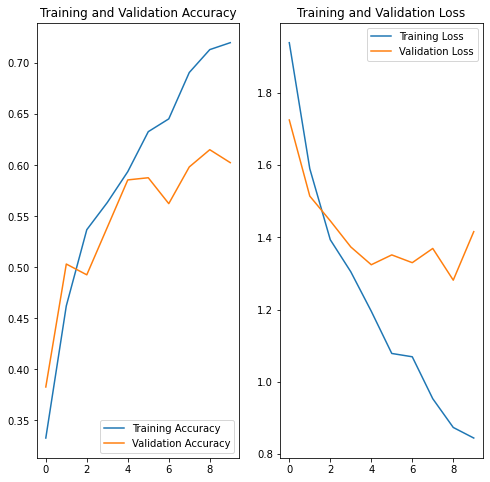

In [26]:
acc = history6.history['accuracy']
val_acc = history6.history['val_accuracy']

loss = history6.history['loss']
val_loss = history6.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# One more model

In [48]:
get_label_name = metadata.features['label'].int2str

image, label = next(iter(train_ds))

NameError: name 'metadata' is not defined

In [52]:
rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255)
])

In [57]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical",input_shape=(img_height, img_width, 3)),
  layers.experimental.preprocessing.RandomRotation(0.2,input_shape=(img_height, img_width, 3)),
])

In [33]:
trainAug = tf.keras.Sequential([
    layers.experimental.preprocessing.Rescaling(scale=1.0 / 255),
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomZoom(
        height_factor=(-0.05, -0.15),
        width_factor=(-0.05, -0.15)),
    layers.experimental.preprocessing.RandomRotation(0.3)
])

In [66]:
i = 0
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    i = i+1

(32, 400, 600, 3)
(32,)
(32, 400, 600, 3)
(32,)
(32, 400, 600, 3)
(32,)
(32, 400, 600, 3)
(32,)
(32, 400, 600, 3)
(32,)
(32, 400, 600, 3)
(32,)
(32, 400, 600, 3)
(32,)
(32, 400, 600, 3)
(32,)
(32, 400, 600, 3)
(32,)
(32, 400, 600, 3)
(32,)
(32, 400, 600, 3)
(32,)
(32, 400, 600, 3)
(32,)
(32, 400, 600, 3)
(32,)
(32, 400, 600, 3)
(32,)
(32, 400, 600, 3)
(32,)
(32, 400, 600, 3)
(32,)
(32, 400, 600, 3)
(32,)
(32, 400, 600, 3)
(32,)
(32, 400, 600, 3)
(32,)
(32, 400, 600, 3)
(32,)
(32, 400, 600, 3)
(32,)
(32, 400, 600, 3)
(32,)
(32, 400, 600, 3)
(32,)
(32, 400, 600, 3)
(32,)
(32, 400, 600, 3)
(32,)
(32, 400, 600, 3)
(32,)
(32, 400, 600, 3)
(32,)
(32, 400, 600, 3)
(32,)
(32, 400, 600, 3)
(32,)
(32, 400, 600, 3)
(32,)
(32, 400, 600, 3)
(32,)
(32, 400, 600, 3)
(32,)
(32, 400, 600, 3)
(32,)
(32, 400, 600, 3)
(32,)
(32, 400, 600, 3)
(32,)
(32, 400, 600, 3)
(32,)
(32, 400, 600, 3)
(32,)
(32, 400, 600, 3)
(32,)
(32, 400, 600, 3)
(32,)
(32, 400, 600, 3)
(32,)
(32, 400, 600, 3)
(32,)
(32, 400, 600, 3

In [67]:
i*32

1920

In [62]:
batch_size = 32
AUTOTUNE = tf.data.AUTOTUNE

def prepare(ds, shuffle=False, augment=False):
    # Resize and rescale all datasets
    ds = ds.map(lambda x, y: (resize_and_rescale(x), y), 
                num_parallel_calls=AUTOTUNE)

    # Use data augmentation only on the training set
    if augment:
        ds = ds.map(lambda x, y: (data_augmentation(x, training=True), y), 
                    num_parallel_calls=AUTOTUNE)

    # Use buffered prefecting on all datasets
    return ds.prefetch(buffer_size=AUTOTUNE)

In [63]:
train_ds = prepare(train_ds, shuffle=False, augment=True)

In [65]:
val_ds

<BatchDataset shapes: ((None, 400, 600, 3), (None,)), types: (tf.float32, tf.int32)>

In [64]:
train_ds

<PrefetchDataset shapes: ((None, 400, 600, 3), (None,)), types: (tf.float32, tf.int32)>

In [35]:
# trainDS = tf.data.Dataset.from_tensor_slices((trainX, trainLabels))
trainDS = (
    train_ds
    .shuffle(batch_size * 100)
    .batch(batch_size)
    .map(lambda x, y: (trainAug(x), y),
         num_parallel_calls=tf.data.AUTOTUNE)
    .prefetch(tf.data.AUTOTUNE)
)

ValueError: in user code:

    <ipython-input-34-a45e208e8359>:6 None  *
        lambda x, y: (trainAug(x), y)
    C:\Users\catar\anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:1012 __call__  **
        outputs = call_fn(inputs, *args, **kwargs)
    C:\Users\catar\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:389 call
        outputs = layer(inputs, **kwargs)
    C:\Users\catar\anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\catar\anaconda3\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:219 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) + ' of layer ' +

    ValueError: Input 0 of layer random_flip_2 is incompatible with the layer: expected ndim=4, found ndim=5. Full shape received: (None, None, 400, 600, 3)


# Another one

In [170]:
model1 = models.Sequential()
# Conv2D(#filters, size of filter, )
model1.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)))
model1.add(layers.Conv2D(32, (3, 3), padding= 'same', input_shape=(img_height, img_width, 3),data_format='channels_last'))
model1.add(layers.Activation('relu'))
model1.add(layers.MaxPooling2D(pool_size=(2, 2)))

model1.add(layers.Conv2D(64, (3, 3)))
model1.add(layers.Activation('relu'))
model1.add(layers.MaxPooling2D(pool_size=(2, 2)))

model1.add(layers.Conv2D(64, (3, 3)))
model1.add(layers.Activation('relu'))
model1.add(layers.MaxPooling2D(pool_size=(2, 2)))

model1.add(layers.Conv2D(64, (3, 3)))
model1.add(layers.Activation('relu'))
model1.add(layers.MaxPooling2D(pool_size=(2, 2)))

model1.add(layers.Conv2D(64, (3, 3)))
model1.add(layers.Activation('relu'))
model1.add(layers.MaxPooling2D(pool_size=(2, 2)))

model1.add(layers.Flatten())
model1.add(layers.Dense(64))
model1.add(layers.Activation('relu'))
model1.add(layers.Dropout(0.2))
model1.add(layers.Dense(num_classes))
model1.add(layers.Activation('softmax'))

model1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [171]:
model1.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_12 (Rescaling)     (None, 400, 600, 3)       0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 400, 600, 32)      896       
_________________________________________________________________
activation_50 (Activation)   (None, 400, 600, 32)      0         
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 200, 300, 32)      0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 198, 298, 64)      18496     
_________________________________________________________________
activation_51 (Activation)   (None, 198, 298, 64)      0         
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 99, 149, 64)     

In [172]:
epochs=10
history7 = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
60/60 [==============================] - 466s 8s/step - loss: 1.9713 - accuracy: 0.3779 - val_loss: 1.3660 - val_accuracy: 0.5391
Epoch 2/10
60/60 [==============================] - 487s 8s/step - loss: 1.1246 - accuracy: 0.6165 - val_loss: 1.2223 - val_accuracy: 0.5983
Epoch 3/10
60/60 [==============================] - 470s 8s/step - loss: 0.7518 - accuracy: 0.7618 - val_loss: 1.1701 - val_accuracy: 0.6089
Epoch 4/10
60/60 [==============================] - 474s 8s/step - loss: 0.5459 - accuracy: 0.8306 - val_loss: 1.3243 - val_accuracy: 0.6364
Epoch 5/10
60/60 [==============================] - 489s 8s/step - loss: 0.4448 - accuracy: 0.8515 - val_loss: 1.1854 - val_accuracy: 0.6681
Epoch 6/10
60/60 [==============================] - 473s 8s/step - loss: 0.2747 - accuracy: 0.8968 - val_loss: 1.5052 - val_accuracy: 0.6617
Epoch 7/10
60/60 [==============================] - 473s 8s/step - loss: 0.2013 - accuracy: 0.9333 - val_loss: 1.3818 - val_accuracy: 0.6808
Epoch 8/10
60

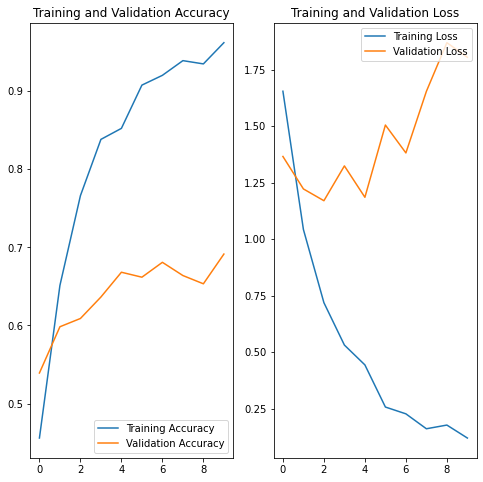

In [176]:
acc = history7.history['accuracy']
val_acc = history7.history['val_accuracy']

loss = history7.history['loss']
val_loss = history7.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Model with just 3 classes

In [177]:
train_ds1 = tf.keras.preprocessing.image_dataset_from_directory(
  "images_model2/Training",
  validation_split=None,
  subset=None,
  seed=None,
  image_size=(img_height, img_width),
  batch_size=batch_size)
val_ds1 = tf.keras.preprocessing.image_dataset_from_directory(
  "images_model2/Validation",
  validation_split=None,
  subset=None,
  seed=None,
  image_size=(img_height, img_width),
  batch_size=batch_size)
class_names1 = train_ds1.class_names
num_classes1 = len(class_names1)
print(class_names1)

Found 827 files belonging to 3 classes.
Found 205 files belonging to 3 classes.
['Liberty', 'Pisa', 'bigBen']


In [190]:
model1 = models.Sequential()
# Conv2D(#filters, size of filter, )
model1.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)))
model1.add(layers.Conv2D(32, (3, 3), padding= 'same', input_shape=(img_height, img_width, 3),data_format='channels_last'))
model1.add(layers.Activation('relu'))
model1.add(layers.MaxPooling2D(pool_size=(2, 2)))

model1.add(layers.Conv2D(64, (3, 3)))
model1.add(layers.Activation('relu'))
model1.add(layers.MaxPooling2D(pool_size=(2, 2)))

model1.add(layers.Conv2D(64, (3, 3)))
model1.add(layers.Activation('relu'))
model1.add(layers.MaxPooling2D(pool_size=(2, 2)))

model1.add(layers.Conv2D(64, (3, 3)))
model1.add(layers.Activation('relu'))
model1.add(layers.MaxPooling2D(pool_size=(2, 2)))

model1.add(layers.Flatten())
model1.add(layers.Dense(64))
model1.add(layers.Activation('relu'))
model1.add(layers.Dropout(0.2))
model1.add(layers.Dense(num_classes))
model1.add(layers.Activation('softmax'))

model1.compile(optimizer='RMSprop',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [187]:
# with SGD
epochs=10
history7 = model1.fit(
  train_ds1,
  validation_data=val_ds1,
  epochs=epochs
)

Epoch 1/10
26/26 [==============================] - 199s 8s/step - loss: 1.8029 - accuracy: 0.2833 - val_loss: 1.1576 - val_accuracy: 0.3512
Epoch 2/10
26/26 [==============================] - 202s 8s/step - loss: 1.2548 - accuracy: 0.3698 - val_loss: 1.1124 - val_accuracy: 0.3902
Epoch 3/10
26/26 [==============================] - 205s 8s/step - loss: 1.1875 - accuracy: 0.3879 - val_loss: 1.0251 - val_accuracy: 0.5268
Epoch 4/10
26/26 [==============================] - 197s 8s/step - loss: 1.1106 - accuracy: 0.4238 - val_loss: 1.1403 - val_accuracy: 0.3707
Epoch 5/10
26/26 [==============================] - 201s 7s/step - loss: 1.0932 - accuracy: 0.4518 - val_loss: 0.9098 - val_accuracy: 0.5415
Epoch 6/10
26/26 [==============================] - 196s 8s/step - loss: 1.0050 - accuracy: 0.5597 - val_loss: 0.8942 - val_accuracy: 0.6537
Epoch 7/10
26/26 [==============================] - 199s 8s/step - loss: 0.8244 - accuracy: 0.6494 - val_loss: 0.8083 - val_accuracy: 0.6732
Epoch 8/10
26

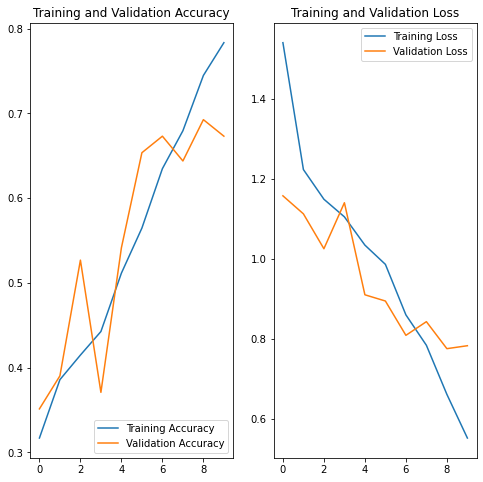

In [188]:
# with SGD
acc = history7.history['accuracy']
val_acc = history7.history['val_accuracy']

loss = history7.history['loss']
val_loss = history7.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [191]:
# with RMSprop
epochs=10
history7 = model1.fit(
  train_ds1,
  validation_data=val_ds1,
  epochs=epochs
)

Epoch 1/10
26/26 [==============================] - 200s 8s/step - loss: 9.9567 - accuracy: 0.3621 - val_loss: 1.1551 - val_accuracy: 0.3366
Epoch 2/10
26/26 [==============================] - 191s 7s/step - loss: 1.0717 - accuracy: 0.5056 - val_loss: 0.9588 - val_accuracy: 0.6049
Epoch 3/10
26/26 [==============================] - 187s 7s/step - loss: 0.9051 - accuracy: 0.6739 - val_loss: 0.8547 - val_accuracy: 0.7024
Epoch 4/10
26/26 [==============================] - 180s 7s/step - loss: 0.6343 - accuracy: 0.7816 - val_loss: 0.7668 - val_accuracy: 0.7317
Epoch 5/10
26/26 [==============================] - 207s 8s/step - loss: 0.5042 - accuracy: 0.8469 - val_loss: 1.2782 - val_accuracy: 0.5561
Epoch 6/10
26/26 [==============================] - 203s 8s/step - loss: 0.3840 - accuracy: 0.8586 - val_loss: 0.9651 - val_accuracy: 0.7122
Epoch 7/10
26/26 [==============================] - 201s 8s/step - loss: 0.2769 - accuracy: 0.9085 - val_loss: 1.1478 - val_accuracy: 0.7561
Epoch 8/10
26

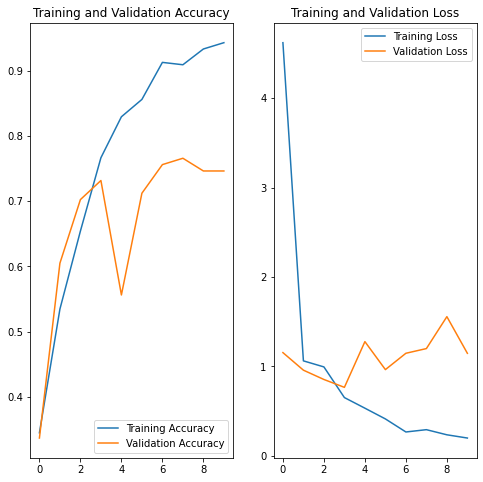

In [192]:
#Results with RMS
acc = history7.history['accuracy']
val_acc = history7.history['val_accuracy']

loss = history7.history['loss']
val_loss = history7.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()